In [9]:
# Import dependencies
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
# Read data
week1 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week1.csv')
week2 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week2.csv')
week3 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week3.csv')
week4 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week4.csv')
week5 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week5.csv')
week6 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week6.csv')
week7 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week7.csv')
week8 = pd.read_csv('https://storage.googleapis.com/big-data-bowl/week8.csv')

tracking = week1.append([
    week2,
    week3,
    week4,
    week5,
    week6,
    week7,
    week8,
])

In [3]:
# Slice for football data
football_tracking = tracking.copy().loc[tracking['team'] == 'football']
football_tracking.drop(['nflId', 'jerseyNumber', 'team', 'o', 'dir'], axis=1, inplace=True)

In [6]:
# Extract event frequenices
def event_frequency(event):
    football_exploration = football_tracking.copy()
    football_exploration[event] = football_exploration['event'].apply(lambda x: int(x == event))
    return football_exploration[['gameId', 'playId', event]].groupby(['gameId', 'playId']).max()[event].mean()

football_events = football_tracking.event.drop_duplicates()
football_events_df = pd.DataFrame({'event': football_events, 'frequency': football_events.apply(event_frequency)})

In [16]:
football_events_df.sort_values(by='frequency', ascending=False, inplace=True)

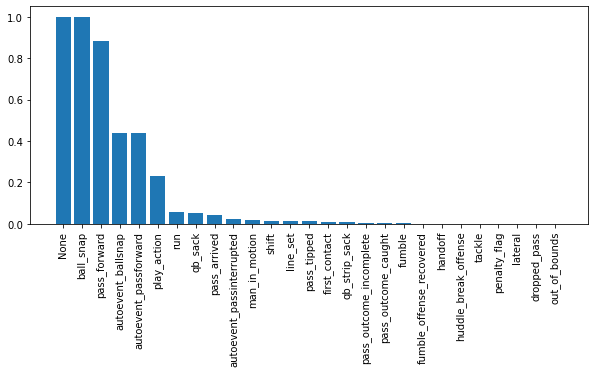

In [29]:
fig, ax = plt.subplots(figsize = (10,4))
plt.bar(range(len(football_events_df)), football_events_df['frequency'])
ax.set_xticks(range(len(football_events_df)))
ax.set_xticklabels(football_events_df['event'], rotation=90)
plt.show()